# Unsupervised Learning

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unsupervised_data.csv to unsupervised_data.csv


In [ ]:
import pandas as pd
data = pd.read_csv('unsupervised_data.csv')
print(data.shape)

(40000, 7)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def train_test_split(data, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
def k_means_plus_plus_init(data, k, random_seed=42):
    np.random.seed(random_seed)
    data = np.array(data)
    n_samples = data.shape[0]
    centroids = [data[np.random.choice(n_samples)]]

    for _ in range(1, k):
        distances = np.min(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
        probabilities = distances / distances.sum()
        cumulative_probs = np.cumsum(probabilities)
        random_val = np.random.rand()
        next_centroid = data[np.searchsorted(cumulative_probs, random_val)]
        centroids.append(next_centroid)

    return np.array(centroids)

In [ ]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    data = np.array(data)
    centroids = k_means_plus_plus_init(data, k)

    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            data[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    return centroids, labels

In [ ]:
def plot_clusters(data, labels, centroids, title="K-Means Clustering"):
    data = np.array(data)
    plt.figure(figsize=(8, 6))

    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}", alpha=0.6)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

Starting K-Means Clustering...
Performing clustering on training data...
Clustering completed.
Centroids (Training Data):
 [[ 1.49984340e+04 -9.41919951e+00 -3.22875174e+00 -8.98052313e+00
   5.61099152e-01 -2.32833864e+01 -2.62474991e+00]
 [ 3.50047266e+04 -9.40858869e+00 -2.90036906e+00 -9.39312620e+00
   4.81080271e-01 -2.30910434e+01 -3.27646056e+00]
 [ 2.50031754e+04 -9.61471655e+00 -3.48656391e+00 -9.50651658e+00
   4.32454592e-01 -2.29626975e+01 -2.76792723e+00]
 [ 5.01679523e+03 -9.88577308e+00 -1.60298947e+00 -8.93999539e+00
   7.02119470e-01 -2.33086614e+01 -3.80352507e+00]]
Plotting clusters for training data...


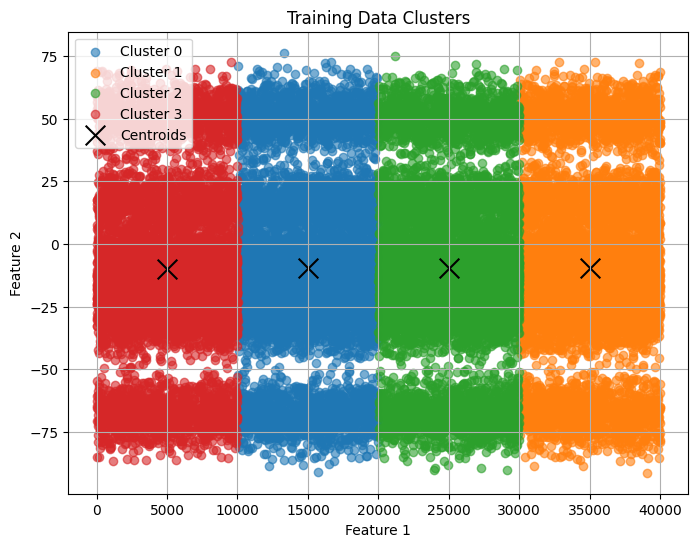

Assigning clusters to test data...
Plotting clusters for test data...


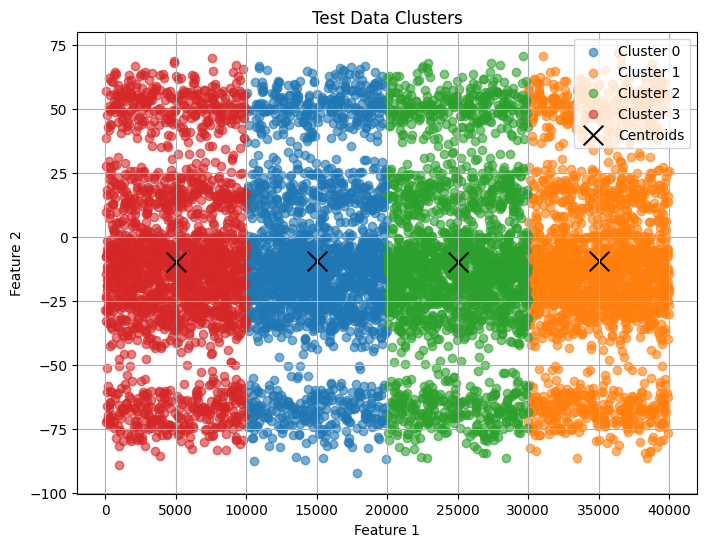

Done!


In [ ]:
    print("Starting K-Means Clustering...")

    data=data
    train_data, test_data = train_test_split(data, test_size=0.2)
    k = 4

    print("Performing clustering on training data...")
    centroids, labels = kmeans(train_data, k)

    print("Clustering completed.")
    print("Centroids (Training Data):\n", centroids)

    print("Plotting clusters for training data...")
    plot_clusters(train_data.iloc[:, :2], labels, centroids[:, :2], title="Training Data Clusters")

    print("Assigning clusters to test data...")
    test_distances = np.linalg.norm(test_data.values[:, np.newaxis] - centroids, axis=2)
    test_labels = np.argmin(test_distances, axis=1)

    print("Plotting clusters for test data...")
    plot_clusters(test_data.iloc[:, :2], test_labels, centroids[:, :2], title="Test Data Clusters")

    print("Done!")